## A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.  The company wants to know:                   Which variables are significant in predicting the demand for shared bikes.                                How well those variables describe the bike demands

In [1]:
# Importing all required packages

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# load the dataset

df= pd.read_csv("day.csv")

In [3]:
# read the data 
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# checking the missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [8]:
# Checking the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
num_vars =['temp','atemp','hum','windspeed','cnt']

<Figure size 864x576 with 0 Axes>

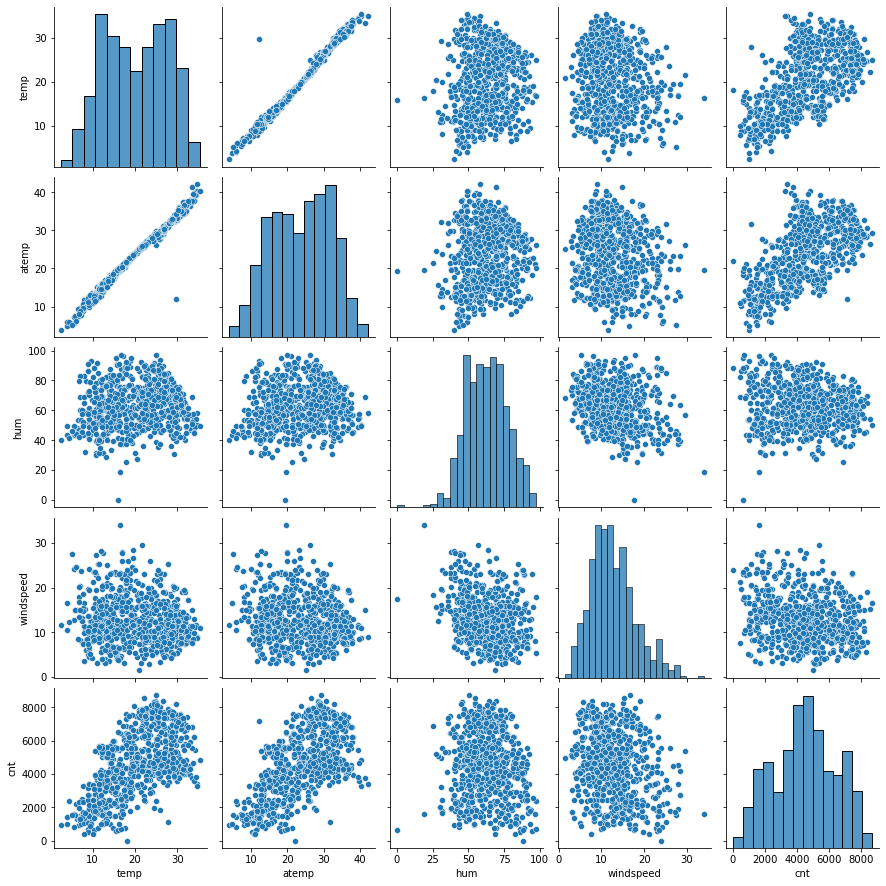

In [10]:
plt.figure(figsize=(12,8))
sns.pairplot(df[num_vars])
plt.show()

### Inference from above visualisation
1) temp and atemp are highly correlated variables.

2) As the temperature increases the number of users/ demand for bikes on rent will also increase.

In [11]:
df[num_vars].corr()

temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000

In [12]:
df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),
                ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), 
                inplace=True)

In [13]:
df['mnth'].value_counts()

Oct    62
Jul    62
Jan    62
May    62
Dec    62
Aug    62
Mar    62
Sep    60
Apr    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [14]:
df['weekday'].replace((0,1,2,3,4,5,6),
                      ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'), inplace=True)

In [15]:
df['weekday'].value_counts()

Wed    105
Tue    105
Thu    104
Mon    104
Sat    104
Fri    104
Sun    104
Name: weekday, dtype: int64

In [16]:
df.season.replace((1,2,3,4), 
                  ('Spring','Summer','Fall','Winter'), inplace=True)

In [17]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [18]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
df.weathersit.replace((1,2,3,4),
                      ('Clear','Mist + Cloudy','Light Snow','Heavy Rain'), 
                      inplace=True)

In [20]:
df.weathersit.value_counts()

Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64

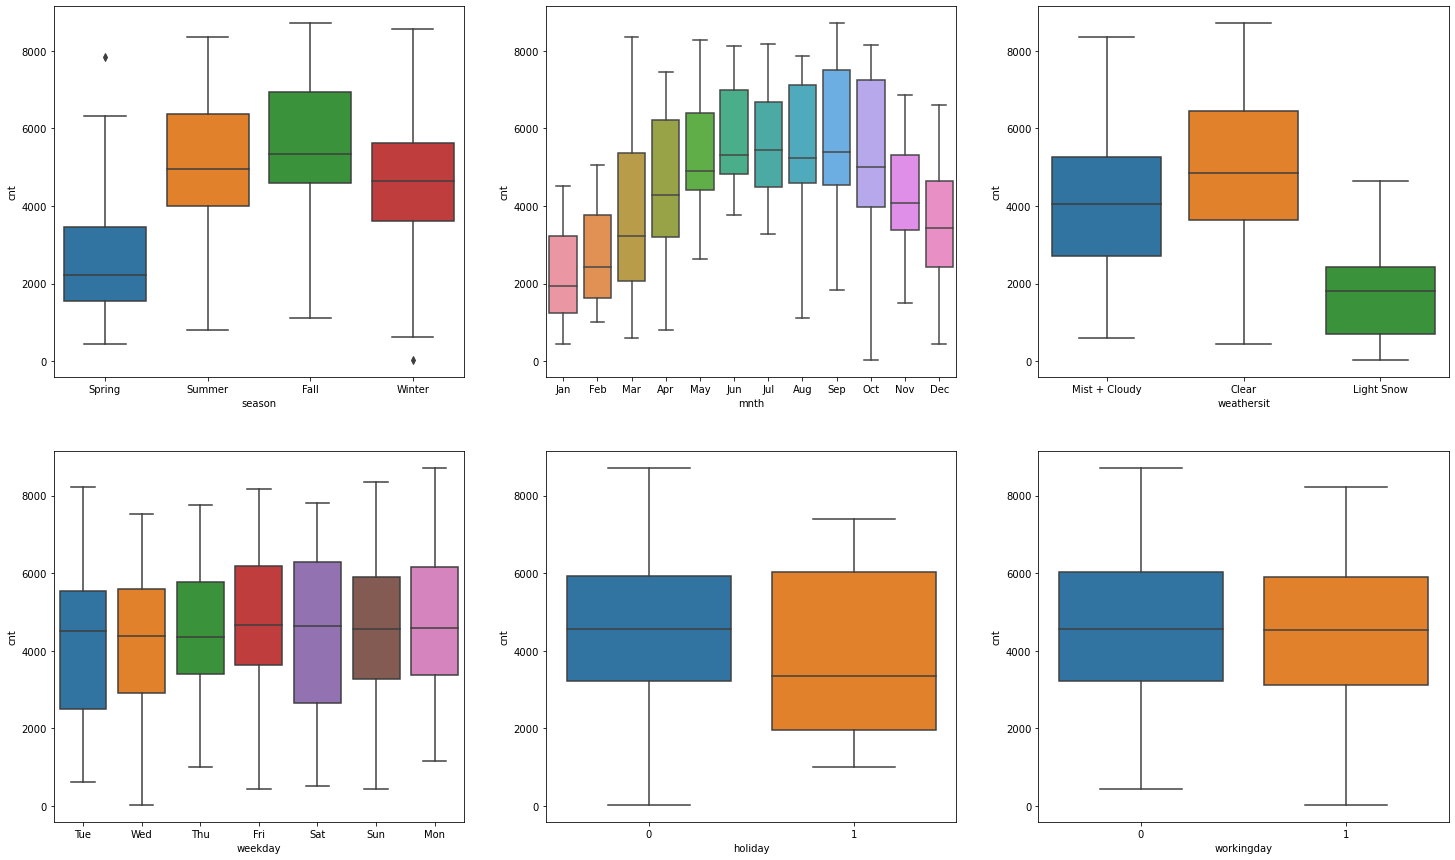

In [21]:
#loop for many categorical data

plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

## Inference from above visualisation
1) Season : Demand is more during the Summer and Fall seasons on workings day ,bikers are rented more as compared to holidays

2) Month : Users are riding bikes mainly in between march and september (3-7 month) which coincides with the higher demand in Summer and Fall seasons

3) The day of week does not have much impact on rented bikes.

4) in year 2019 the more bikes are on rent as compared to 2018

5) Weather situation also plays an important part for riding bikes when its Clear, Few clouds, Partly cloudy, Partly cloudy wetaher.

#  Dummies creation
`weekday` `mnth` `season` `weathersit`

In [22]:
season2 = pd.get_dummies(df['season'])

In [23]:
season2 = pd.get_dummies(df['season'], drop_first = True)

In [24]:
season2.head()

Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [25]:
df = pd.concat([df, season2], axis = 1)

In [26]:
df.head()

instant     dteday  season  yr mnth  holiday weekday  workingday  \
0        1 2018-01-01  Spring   0  Jan        0     Tue           1   
1        2 2018-02-01  Spring   0  Jan        0     Wed           1   
2        3 2018-03-01  Spring   0  Jan        0     Thu           1   
3        4 2018-04-01  Spring   0  Jan        0     Fri           1   
4        5 2018-05-01  Spring   0  Jan        0     Sat           1   

      weathersit       temp     atemp      hum  windspeed  casual  registered  \
0  Mist + Cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1  Mist + Cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2          Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3          Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4          Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  Spring  Summer  Winter  
0   985       1       0       0  
1   801       1       0       0  
2  1349       1       0       0  
3  1562       1       0       0  
4  1600       1       0       0

In [27]:
#creating the dummy variables
days = pd.get_dummies(df['weekday'])

In [28]:
#using drop_first to drop the first variable for each set of dummies created
days = pd.get_dummies(df['weekday'],drop_first = True )

In [29]:
df = pd.concat([df, days], axis = 1)

In [30]:
df.head()

instant     dteday  season  yr mnth  holiday weekday  workingday  \
0        1 2018-01-01  Spring   0  Jan        0     Tue           1   
1        2 2018-02-01  Spring   0  Jan        0     Wed           1   
2        3 2018-03-01  Spring   0  Jan        0     Thu           1   
3        4 2018-04-01  Spring   0  Jan        0     Fri           1   
4        5 2018-05-01  Spring   0  Jan        0     Sat           1   

      weathersit       temp  ...   cnt  Spring  Summer  Winter  Mon  Sat  Sun  \
0  Mist + Cloudy  14.110847  ...   985       1       0       0    0    0    0   
1  Mist + Cloudy  14.902598  ...   801       1       0       0    0    0    0   
2          Clear   8.050924  ...  1349       1       0       0    0    0    0   
3          Clear   8.200000  ...  1562       1       0       0    0    0    0   
4          Clear   9.305237  ...  1600       1       0       0    0    1    0   

   Thu  Tue  Wed  
0    0    1    0  
1    0    0    1  
2    1    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 25 columns]

In [31]:
#creating the dummy variables
months= pd.get_dummies(df['mnth']) 

In [32]:
#using drop_first to drop the first variable for each set of dummies created

months = pd.get_dummies(df['mnth'],drop_first = True )


In [33]:
df = pd.concat([df, months], axis = 1)

In [34]:
weather= pd.get_dummies(df['weathersit']) 

In [35]:
#using drop_first to drop the first variable for each set of dummies created
weather= pd.get_dummies(df['weathersit'],drop_first = True )

In [36]:
#creating the dummy variables
df = pd.concat([df, weather], axis = 1)

In [37]:
df.head()

instant     dteday  season  yr mnth  holiday weekday  workingday  \
0        1 2018-01-01  Spring   0  Jan        0     Tue           1   
1        2 2018-02-01  Spring   0  Jan        0     Wed           1   
2        3 2018-03-01  Spring   0  Jan        0     Thu           1   
3        4 2018-04-01  Spring   0  Jan        0     Fri           1   
4        5 2018-05-01  Spring   0  Jan        0     Sat           1   

      weathersit       temp  ...  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  \
0  Mist + Cloudy  14.110847  ...    1    0    0    0    0    0    0    0   
1  Mist + Cloudy  14.902598  ...    1    0    0    0    0    0    0    0   
2          Clear   8.050924  ...    1    0    0    0    0    0    0    0   
3          Clear   8.200000  ...    1    0    0    0    0    0    0    0   
4          Clear   9.305237  ...    1    0    0    0    0    0    0    0   

   Light Snow  Mist + Cloudy  
0           0              1  
1           0              1  
2           0              0  
3           0              0  
4           0              0  

[5 rows x 38 columns]

In [38]:
# Droping the unnecessary columns

df.drop(['instant'], axis = 1, inplace = True)
df.drop(['atemp'], axis = 1, inplace = True)
df.drop(['dteday'], axis = 1, inplace = True)
df.drop(['season'], axis = 1, inplace = True)

In [39]:
df= df.drop(['mnth','weekday','weathersit'],axis=1)

In [40]:
df.drop(['casual','registered'], axis=1, inplace=True)

In [41]:
df.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  Spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   Summer  Winter  ...  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Light Snow  \
0       0       0  ...    1    0    0    0    0    0    0    0           0   
1       0       0  ...    1    0    0    0    0    0    0    0           0   
2       0       0  ...    1    0    0    0    0    0    0    0           0   
3       0       0  ...    1    0    0    0    0    0    0    0           0   
4       0       0  ...    1    0    0    0    0    0    0    0           0   

   Mist + Cloudy  
0              1  
1              1  
2              0  
3              0  
4              0  

[5 rows x 29 columns]

In [42]:
# Checking the dtypes of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Spring         730 non-null    uint8  
 8   Summer         730 non-null    uint8  
 9   Winter         730 non-null    uint8  
 10  Mon            730 non-null    uint8  
 11  Sat            730 non-null    uint8  
 12  Sun            730 non-null    uint8  
 13  Thu            730 non-null    uint8  
 14  Tue            730 non-null    uint8  
 15  Wed            730 non-null    uint8  
 16  Aug            730 non-null    uint8  
 17  Dec            730 non-null    uint8  
 18  Feb       

## Step 4: Data Splitting


In [43]:
import sklearn
from sklearn.model_selection import train_test_split

In [44]:
# We will split the entire data set into training set and testing set in 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [45]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 
We will use MinMax scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
num_vars =['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  Spring  \
576   1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255       1   
728   1        0           1  0.245101  0.498067   0.663106  0.204096       1   
482   1        0           0  0.395666  0.504508   0.188475  0.482973       0   
111   0        0           0  0.345824  0.751824   0.380981  0.191095       0   

     Summer  Winter  ...  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Light Snow  \
576       0       0  ...    0    1    0    0    0    0    0    0           0   
426       0       0  ...    0    0    0    1    0    0    0    0           0   
728       0       0  ...    0    0    0    0    0    0    0    0           0   
482       1       0  ...    0    0    0    0    0    0    0    0           0   
111       1       0  ...    0    0    0    0    0    0    0    0           0   

     Mist + Cloudy  
576              0  
426              1  
728              0  
482              1  
111              1  

[5 rows x 29 columns]

In [49]:
df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.453386    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      Spring      Summer      Winter  ...         Jan  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.243137    0.247059    0.247059  ...    0.088235   
std      0.224421    0.429398    0.431725    0.431725  ...    0.283915   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Jul         Jun         Mar         May         Nov         Oct  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.076471    0.076471    0.098039    0.084314    0.086275    0.084314   
std      0.266010    0.266010    0.297660    0.278131    0.281045    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Sep  Light Snow  Mist + Cloudy  
count  510.000000  510.000000     510.000000  
mean     0.080392    0.029412       0.345098  
std      0.272166    0.169124       0.475867  
min      0.000000    0.000000       0.000000  
25%      0.000000    0.000000       0.000000  
50%      0.000000    0.000000       0.000000  
75%      0.000000    0.000000       1.000000  
max      1.000000    1.000000       1.000000  

[8 rows x 29 columns]

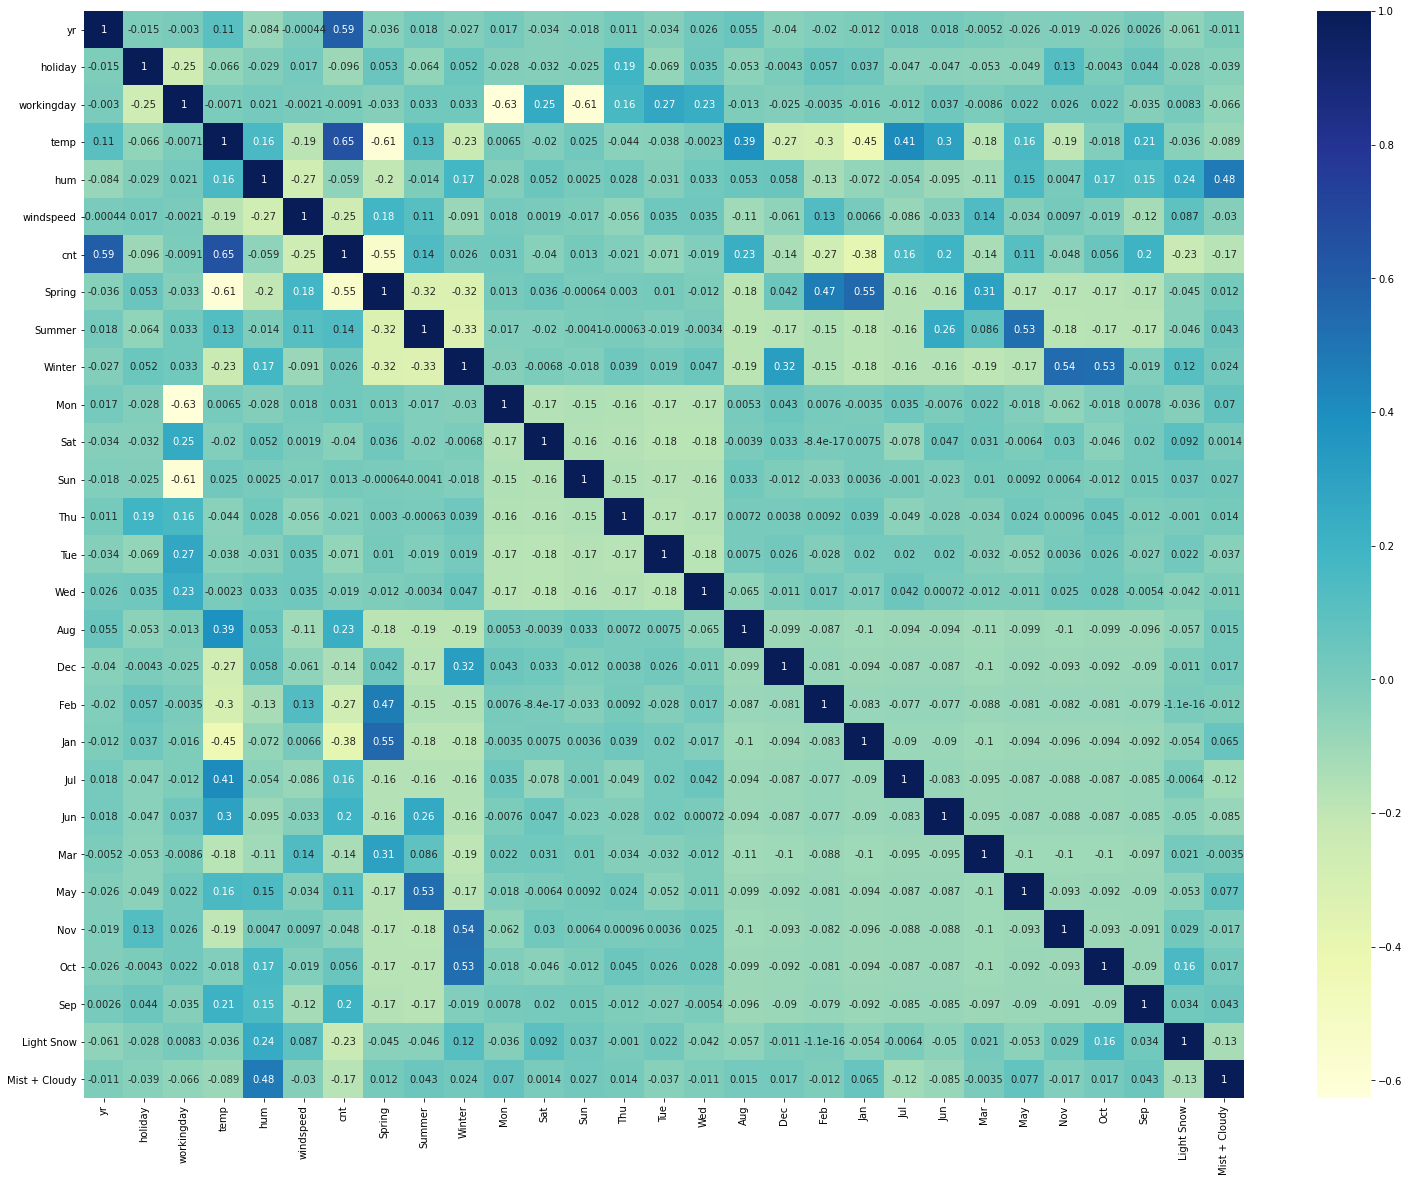

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

yr, atemp, temp are highly correlated to cnt. Let's see a pairplot for them.

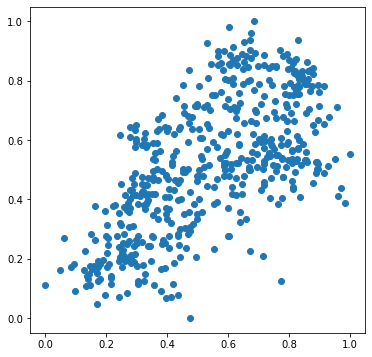

In [51]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

In [53]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [54]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  Spring  Summer  \
576   1        0           1  0.815169  0.725633   0.264686       0       0   
426   1        0           0  0.442393  0.640189   0.255342       1       0   
728   1        0           1  0.245101  0.498067   0.663106       1       0   
482   1        0           0  0.395666  0.504508   0.188475       0       1   
111   0        0           0  0.345824  0.751824   0.380981       0       1   

     Winter  Mon  ...  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  Light Snow  \
576       0    0  ...    0    1    0    0    0    0    0    0           0   
426       0    1  ...    0    0    0    1    0    0    0    0           0   
728       0    0  ...    0    0    0    0    0    0    0    0           0   
482       0    1  ...    0    0    0    0    0    0    0    0           0   
111       0    1  ...    0    0    0    0    0    0    0    0           0   

     Mist + Cloudy  
576              0  
426              1  
728              0  
482              1  
111              1  

[5 rows x 28 columns]

In [55]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Step 5: Building a linear model
1) This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [56]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 15)          
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Mon', False, 5),
 ('Sat', False, 13),
 ('Sun', False, 4),
 ('Thu', False, 10),
 ('Tue', False, 7),
 ('Wed', False, 6),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Feb',
       'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [64]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          8.15e-189
Time:                        23:29:54   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [65]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  30.89
2            temp  17.79
4       windspeed   4.72
5          Spring   4.37
7          Winter   4.06
6          Summer   2.82
14  Mist + Cloudy   2.32
0              yr   2.09
11            Nov   1.85
9             Jan   1.75
10            Jul   1.59
8             Dec   1.56
12            Sep   1.41
13     Light Snow   1.28
1         holiday   1.06

## Dropping the variable and rebuilding the model
1) As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Dec as it has a approx p-value of 0.017 . Let's go ahead and drop this variables.

## Model 2: 

In [67]:
X_train_2 = X_train_rfe.drop(["Dec"], axis = 1)

In [68]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(X_train_2)

In [69]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [70]:
#Let's see the summary of our linear model

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          4.41e-189
Time:                        23:29:55   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [71]:
# Calculate the VIFs for the new model

vif_2 = pd.DataFrame()
X = X_train_2
vif_2['Features'] = X.columns
vif_2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_2['VIF'] = round(vif_2['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF", ascending = False)
vif_2

Features    VIF
3             hum  29.09
2            temp  16.80
4       windspeed   4.72
5          Spring   4.37
7          Winter   3.78
6          Summer   2.80
13  Mist + Cloudy   2.29
0              yr   2.09
8             Jan   1.67
10            Nov   1.60
9             Jul   1.59
11            Sep   1.40
12     Light Snow   1.25
1         holiday   1.06

## Dropping the variable and rebuilding the model                                                                  
As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Nov as it has p value 0.174. Let's go ahead and drop this variables

## Model 3:

In [72]:
X_train_3 = X_train_2.drop(["Nov"], axis = 1)

In [73]:
# Adding a constant variable 
X_train_lm_3 = sm.add_constant(X_train_3)

In [74]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()

In [75]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          7.59e-190
Time:                        23:29:56   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2964      0.035      8.483

In [76]:
# Calculate the VIFs for the new model

vif_3 = pd.DataFrame()
X = X_train_3
vif_3['Features'] = X.columns
vif_3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_3['VIF'] = round(vif_3['VIF'], 2)
vif_3 = vif_3.sort_values(by = "VIF", ascending = False)
vif_3

Features    VIF
3             hum  29.02
2            temp  16.71
4       windspeed   4.66
5          Spring   4.34
7          Winter   3.36
6          Summer   2.79
12  Mist + Cloudy   2.29
0              yr   2.09
8             Jan   1.67
9             Jul   1.59
10            Sep   1.38
11     Light Snow   1.24
1         holiday   1.04

## Model 4

## Dropping the variable and rebuilding the model¶
As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, hum as it has high vif value 29.02 . Let's go ahead and drop this variables

In [77]:
X_train_4 = X_train_3.drop(["hum"], axis = 1)

In [78]:
# Adding a constant variable
X_train_lm_4 = sm.add_constant(X_train_4)

In [79]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()

In [80]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          8.14e-187
Time:                        23:29:56   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [81]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_4 = pd.DataFrame()
X = X_train_4
vif_4['Features'] = X.columns
vif_4['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_4['VIF'] = round(vif_4['VIF'], 2)
vif_4 = vif_4.sort_values(by = "VIF", ascending = False)
vif_4

Features   VIF
2            temp  5.13
3       windspeed  4.62
4          Spring  2.75
5          Summer  2.24
0              yr  2.07
6          Winter  1.78
7             Jan  1.61
8             Jul  1.59
11  Mist + Cloudy  1.56
9             Sep  1.34
10     Light Snow  1.08
1         holiday  1.04

## Model 5

## Dropping the variable and rebuilding the model¶
Jan has P value of 0.033 and dropping this variables

In [82]:
X_train_5 = X_train_4.drop(["Jan"], axis = 1)

In [83]:
X_train_lm_5 = sm.add_constant(X_train_5)

In [84]:
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()

In [85]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          5.06e-187
Time:                        23:29:57   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746

In [86]:
# Calculate the VIFs for the new model

vif_5 = pd.DataFrame()
X = X_train_5
vif_5['Features'] = X.columns
vif_5['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_5['VIF'] = round(vif_5['VIF'], 2)
vif_5 = vif_5.sort_values(by = "VIF", ascending = False)
vif_5

Features   VIF
2            temp  5.09
3       windspeed  4.60
5          Summer  2.23
4          Spring  2.08
0              yr  2.07
6          Winter  1.78
7             Jul  1.58
10  Mist + Cloudy  1.55
8             Sep  1.34
9      Light Snow  1.08
1         holiday  1.04

## Model 6:

In [87]:
X_train_6 = X_train_5.drop(["windspeed"], axis = 1)

In [88]:
X_train_lm_6 = sm.add_constant(X_train_6)

In [89]:
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()

In [90]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          5.71e-181
Time:                        23:29:57   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124

In [91]:
vif_6 = pd.DataFrame()
X = X_train_6
vif_6['Features'] = X.columns
vif_6['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_6['VIF'] = round(vif_6['VIF'], 2)
vif_6 = vif_6.sort_values(by = "VIF", ascending = False)
vif_6

Features   VIF
2           temp  4.22
0             yr  2.06
4         Summer  1.94
6            Jul  1.58
5         Winter  1.57
9  Mist + Cloudy  1.55
3         Spring  1.40
7            Sep  1.34
8     Light Snow  1.07
1        holiday  1.04

## Model 7:

In [92]:
X_train_7 = X_train_6.drop(["Sep"], axis = 1)

In [93]:
X_train_lm_7 = sm.add_constant(X_train_7)

In [ ]:
lm_7 = sm.OLS(y_train,X_train_lm_7).fit()

In [ ]:
print(lm_7.summary())

In [ ]:
vif_7 = pd.DataFrame()
X = X_train_7
vif_7['Features'] = X.columns
vif_7['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_7['VIF'] = round(vif_7['VIF'], 2)
vif_7 = vif_7.sort_values(by = "VIF", ascending = False)
vif_7

## Model 8:

In [ ]:
X_train_8 = X_train_7.drop(["Jul"], axis = 1)

In [ ]:
X_train_lm_8 = sm.add_constant(X_train_8)

In [ ]:
lm_8 = sm.OLS(y_train,X_train_lm_8).fit()

In [ ]:
print(lm_8.summary())

In [ ]:
vif_8 = pd.DataFrame()
X = X_train_8
vif_8['Features'] = X.columns
vif_8['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_8['VIF'] = round(vif_8['VIF'], 2)
vif_8 = vif_8.sort_values(by = "VIF", ascending = False)
vif_8

## Step 6: Residual Analysis of the train data                                                                            
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_cnt = lm_8.predict(X_train_lm_8)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label 

In [ ]:
y_train_cnt

In [ ]:
y_train

In [ ]:
df_test.columns

#### Applying the scaling on the test sets

In [ ]:
# Applying scaler() 
num_vars = ['temp','hum', 'windspeed', 'cnt']

# 2. fitting on data
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [ ]:
# test variables
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
X_train_lm_8.drop(['const'],axis= 1, inplace=True)
#df.drop(['instant'], axis = 1, inplace = True)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm_8.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm_8.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(10,6))
sns.regplot(x= y_test, y= y_pred, line_kws={'color':'r'})
plt.title("y_test vs y_pred", fontsize= 20)
plt.xlabel("y-test", fontsize=15)
plt.ylabel("y-pred", fontsize=15)
plt.show()

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.807759277612034

## We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.172+0.233×𝑦𝑟+0.478×𝑡𝑒𝑚𝑝−0.0939×𝑠𝑝𝑟𝑖𝑛𝑔+0.0748×𝑤𝑖𝑛𝑡𝑒𝑟−0.293×𝐿𝑖𝑔ℎ𝑡𝑆𝑛𝑜𝑤−0.0730×𝑀𝑖𝑠𝑡+C𝑙𝑜𝑢𝑑𝑠-0.0896×holiday

###### Adjusted R square for Train model = 0.807 = 80.7%
###### Adjusted R square for Test model = 0.807 = 80.7%